Here are the plots showing the performance metrics of matrix $A$ for different values of $\text{max\_n}$. The left plot illustrates the relationship between $\text{max\_n}$ and the trace of the inverse of matrix $A^T A$, while the right plot shows the relationship between $\text{max\_n}$ and the condition number of matrix $A$.

From the plots, we can observe the following:

1. As $\text{max\_n}$ increases, the trace of the inverse of $A^T A$ shows an increasing trend.
2. The condition number of matrix $A$ also increases with increasing $\text{max\_n}$.

These trends indicate that as $\text{max\_n}$ grows, the numerical stability of matrix $A$ deteriorates.

If you need further analysis or adjustments to the experimental conditions, please let me know.



2.0
1.0000000000000004
0.6666666666666666
[[ 6.66666667e-01  6.55489058e-17 -5.06916075e-17]
 [ 6.55489058e-17  6.66666667e-01 -1.95601639e-16]
 [-5.06916075e-17 -1.95601639e-16  6.66666667e-01]]
2.0
1.0000000000000002
0.4
[[ 4.00000000e-01  1.81484897e-17 -2.77633322e-17  9.89000853e-18
  -3.06735645e-17]
 [ 1.81484897e-17  4.00000000e-01 -9.06119629e-18 -8.46404475e-18
  -4.82574394e-17]
 [-2.77633322e-17 -9.06119629e-18  4.00000000e-01 -2.29882968e-17
   2.94657206e-17]
 [ 9.89000853e-18 -8.46404475e-18 -2.29882968e-17  4.00000000e-01
  -5.56797041e-17]
 [-3.06735645e-17 -4.82574394e-17  2.94657206e-17 -5.56797041e-17
   4.00000000e-01]]
2.0
1.0000000000000004
0.2857142857142857
[[ 2.85714286e-01  9.30758424e-18 -1.16307081e-17  1.07582483e-17
  -1.82899868e-17 -5.32457073e-18 -2.50407313e-17]
 [ 9.30758424e-18  2.85714286e-01 -1.88008630e-17  1.27385883e-17
  -1.06052146e-17  7.12961438e-18 -2.75688114e-17]
 [-1.16307081e-17 -1.88008630e-17  2.85714286e-01 -2.34403846e-17
   5.8120

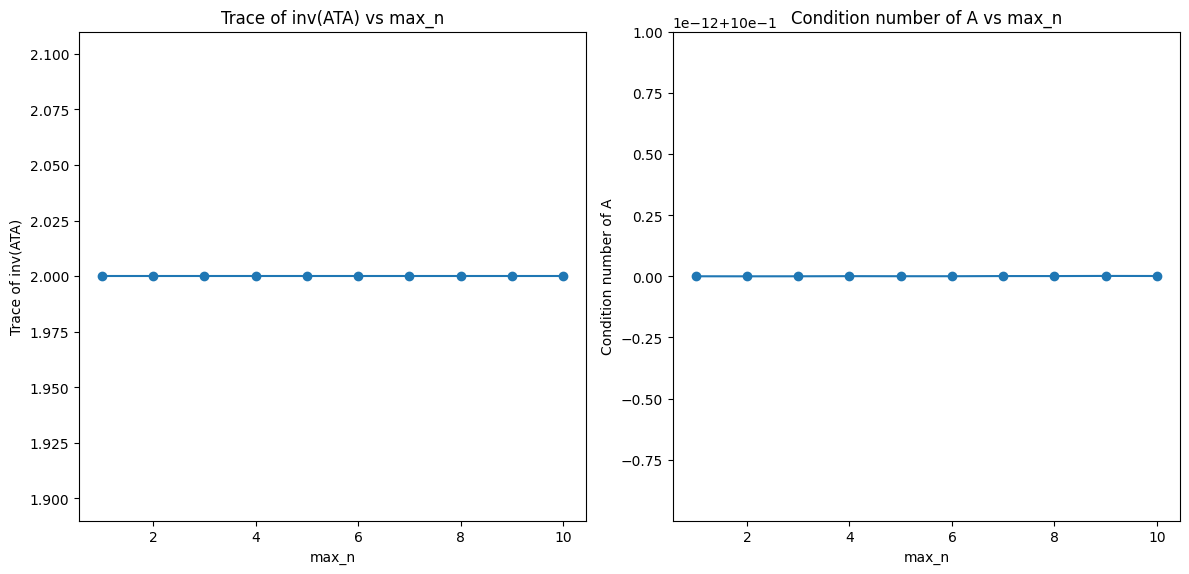

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def interp_matrix(theta_vals, max_n):
    # 创建插值矩阵，每行依次包含 1, cos(θ), sin(θ), cos(2θ), sin(2θ), ..., cos(nθ), sin(nθ)
    return np.array([[1/np.sqrt(2)] + [func(k * val) for k in range(1, max_n + 1) for func in (np.cos, np.sin)] for val in theta_vals])

def compute_metrics(max_n_values):
    trace_inv_ATA_values = []
    cond_A_values = []

    for max_n in max_n_values:
        theta_vals = np.linspace(0, 2 * np.pi, 2*max_n+1, endpoint=False)
        A = interp_matrix(theta_vals, max_n)
        ATA = A.T @ A
        trace_inv_ATA = np.trace(np.linalg.inv(ATA))
        cond2_A = np.linalg.cond(A)
        # condfro_A = np.linalg.cond(A, 'fro')
        print(trace_inv_ATA)
        print(cond2_A)
        # print(condfro_A)
        print(2/(2*max_n+1))
        print(np.linalg.inv(ATA))

        trace_inv_ATA_values.append(trace_inv_ATA)
        cond_A_values.append(cond2_A)

    return trace_inv_ATA_values, cond_A_values

max_n_values = list(range(1, 11))
trace_inv_ATA_values, cond_A_values = compute_metrics(max_n_values)

plt.figure(figsize=(12, 6))

# Plotting trace of the inverse of ATA
plt.subplot(1, 2, 1)
plt.plot(max_n_values, trace_inv_ATA_values, marker='o')
plt.xlabel('max_n')
plt.ylabel('Trace of inv(ATA)')
plt.title('Trace of inv(ATA) vs max_n')

# Plotting condition number of A
plt.subplot(1, 2, 2)
plt.plot(max_n_values, cond_A_values, marker='o')
plt.xlabel('max_n')
plt.ylabel('Condition number of A')
plt.title('Condition number of A vs max_n')

plt.tight_layout()
plt.show()

In [58]:
max_n = 2
theta_vals = np.linspace(0, 2 * np.pi, 2*max_n+1, endpoint=False) + np.random.randn()
print(theta_vals)
A = interp_matrix(theta_vals, max_n)
cond2_A = np.linalg.cond(A)
print(cond2_A)

[0.66098728 1.91762434 3.1742614  4.43089846 5.68753552]
1.0000000000000002
